In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os 
import sys

sys.path.append('../boxcox')
sys.path.append('../comparison')
sys.path.append('../dCor')
sys.path.append('../MCI')

from img_comparison import compare_images

from scipy.spatial import distance
from minepy import MINE
import dcor 

from scipy.stats import pearsonr

In [ ]:
def get_all_comp(img_1, img_2, method = 'full'):

    comp = compare_images(img_1, img_2)

    # dcor
    dcorr_func = lambda x, y: dcor.distance_correlation(x, y)
    dcor_res = comp.compare_images(function=dcorr_func, comparison_method= method)

    dcov_func = lambda x, y: dcor.distance_covariance(x, y)
    dcov_res = comp.compare_images(function=dcov_func, comparison_method= method)

    # # lmc
    # lmc = lambda x, y: LocalMaximalCorr(x, y).local_maximal_corr()[0]
    # lmc_res = comp.compare_images(function=lmc, comparison_method= method)

    # mic
    def mic(x, y):
        m = MINE(alpha=0.6, c=15, est="mic_e")
        m.compute_score(x, y)
        return m.mic()
    
    mic_e = lambda x, y:  mic(x, y)
    mic_e_res = comp.compare_images(function=mic_e, comparison_method= method)

    # tic
    def tic(x, y):
        m = MINE(alpha=0.6, c=15, est="mic_e")
        m.compute_score(x, y)
        return m.tic()
    tic_e = lambda x, y:  tic(x, y)
    tic_e_res = comp.compare_images(function=tic_e, comparison_method= method)


    # corr
    corr = lambda x, y: pearsonr(x, y)[0]
    corr_res = comp.compare_images(function=corr, comparison_method= method)

    return dcor_res,dcov_res , mic_e_res, tic_e_res, corr_res


    

In [ ]:
images_df_full = pd.DataFrame(columns=['n_image', 'lambda_full','dcor_full', 'dcov_full' ,  'mic_full', 'tic_full', 'pearson_full'
                                           , 'lambda_hist', 'dcor_hist', 'dcov_hist' ,  'mic_hist', 'tic_hist', 'pearson_hist'
                                           , 'lambda_grid' , 'dcor_grid', 'dcov_grid' ,  'mic_grid', 'tic_grid', 'pearson_grid'
                                           ])

images_df_hist = pd.DataFrame(columns=['n_image', 'lambda_full','dcor_full', 'dcov_full' ,  'mic_full', 'tic_full', 'pearson_full'
                                             , 'lambda_hist', 'dcor_hist', 'dcov_hist' ,  'mic_hist', 'tic_hist', 'pearson_hist'
                                             , 'lambda_grid' , 'dcor_grid', 'dcov_grid' ,  'mic_grid', 'tic_grid', 'pearson_grid'
                                             ])


In [ ]:
from box_cox_img import BoxCoxImg
import matplotlib.pyplot as plt

from tqdm import tqdm

# for i in tqdm(range(1, 25)):
#     img_path = f'../../boxcox/img/{i}.png'
    
#     BCI = BoxCoxImg(img_path)
#     # plt.imshow(BCI.bw_img, cmap='gray')
#     # plt.show()


#     #full
#     full_bc, lam_full = BCI.transform(method='full')
#     # plt.imshow(full_bc, cmap='gray')
#     # plt.show()
    

#     #hist
#     hist_bc, lam_hist = BCI.transform(method='hist')
#     # plt.imshow(hist_bc, cmap='gray')
#     # plt.show()

#     #grid
#     grid_bc, lam_grid = BCI.transform(method='grid')
#     # plt.imshow(grid_bc, cmap='gray')
#     # plt.show()

#     fig, ax = plt.subplots(1, 4, figsize=(20, 5))


#     ax[0].imshow(BCI.bw_img, cmap='gray')
#     ax[0].set_title('Original')
#     ax[0].grid(False)

#     ax[1].imshow(full_bc, cmap='gray')
#     ax[1].set_title(f'Method: full, lambda={lam_full:.2f}')
#     ax[1].grid(False)

#     ax[2].imshow(hist_bc, cmap='gray')
#     ax[2].set_title(f'Method: hist, lambda={lam_hist:.2f}')
#     ax[2].grid(False)

#     ax[3].imshow(grid_bc, cmap='gray')
#     ax[3].set_title(f'Method: grid, lambda={lam_grid:.2f}')
#     ax[3].grid(False)

#     plt.show()
#     dcor_full_full, dcov_full_full ,mic_full_full, tic_full_full, corr_full_full = get_all_comp(BCI.bw_img, full_bc, method='full')
#     print(f'full bc, full comp: dcor={dcor_full_full}, dcov={dcov_full_full}, mic={mic_full_full}, tic={tic_full_full}, corr={corr_full_full}')

#     dcor_full_hist, dcov_full_hist ,mic_full_hist, tic_full_hist, corr_full_hist = get_all_comp(BCI.bw_img, hist_bc, method='full')
#     print(f'hist bc, full comp: dcor={dcor_full_hist}, dcov={dcov_full_hist}, mic={mic_full_hist}, tic={tic_full_hist}, corr={corr_full_hist}')
    
#     dcor_full_grid, dcov_full_grid ,mic_full_grid, tic_full_grid, corr_full_grid = get_all_comp(BCI.bw_img, grid_bc, method='full')
#     print(f'grid bc, full comp: dcor={dcor_full_grid}, dcov={dcov_full_grid}, mic={mic_full_grid}, tic={tic_full_grid}, corr={corr_full_grid}')

#     dcor_hist_full, dcov_hist_full ,mic_hist_full, tic_hist_full, corr_hist_full = get_all_comp(BCI.bw_img, full_bc, method='hist')
#     print(f'full bc, hist comp: dcor={dcor_hist_full}, dcov={dcov_hist_full}, mic={mic_hist_full}, tic={tic_hist_full}, corr={corr_hist_full}')

#     dcor_hist_hist, dcov_hist_hist ,mic_hist_hist, tic_hist_hist, corr_hist_hist = get_all_comp(BCI.bw_img, hist_bc, method='hist')
#     print(f'hist bc, hist comp: dcor={dcor_hist_hist}, dcov={dcov_hist_hist}, mic={mic_hist_hist}, tic={tic_hist_hist}, corr={corr_hist_hist}')

#     dcor_hist_grid, dcov_hist_grid ,mic_hist_grid, tic_hist_grid, corr_hist_grid = get_all_comp(BCI.bw_img, grid_bc, method='hist')
#     print(f'grid bc, hist comp: dcor={dcor_hist_grid}, dcov={dcov_hist_grid}, mic={mic_hist_grid}, tic={tic_hist_grid}, corr={corr_hist_grid}')
    


#     images_df_full = pd.concat([images_df_full, pd.DataFrame([[i, lam_full, dcor_full_full, dcov_full_full, mic_full_full, tic_full_full, corr_full_full
#                                                             , lam_hist, dcor_full_hist, dcov_full_hist, mic_full_hist, tic_full_hist, corr_full_hist
#                                                             , lam_grid, dcor_full_grid, dcov_full_grid, mic_full_grid, tic_full_grid, corr_full_grid]]
#                                                             , columns=images_df_full.columns)], ignore_index=True)
                                                               


#     images_df_hist = pd.concat([images_df_hist, pd.DataFrame([[i, lam_full, dcor_hist_full, dcov_hist_full, mic_hist_full, tic_hist_full, corr_hist_full
#                                                             , lam_hist, dcor_hist_hist, dcov_hist_hist, mic_hist_hist, tic_hist_hist, corr_hist_hist
#                                                             , lam_grid, dcor_hist_grid, dcov_hist_grid, mic_hist_grid, tic_hist_grid, corr_hist_grid]]
#                                                             , columns=images_df_hist.columns)], ignore_index=True)
    
    
#     # break


# images_df_full.to_csv('./images_df_full.csv')
# images_df_hist.to_csv('./images_df_hist.csv')

images_df_full = pd.read_csv('./images_df_full.csv', index_col=0)
images_df_hist = pd.read_csv('./images_df_hist.csv', index_col=0)



In [ ]:
images_df_full

In [ ]:
images_df_full[['n_image', 'lambda_full', 'dcor_full', 'mic_full',
    'pearson_full', 'lambda_hist', 'dcor_hist', 'mic_hist', 'pearson_hist',
      'pearson_hist', 'lambda_grid', 'dcor_grid', 
       'mic_grid', 'pearson_grid']].mean().sort_values(ascending=False)

In [ ]:
images_df_hist[['n_image', 'lambda_full', 'dcor_full', 'mic_full',
    'pearson_full', 'lambda_hist', 'dcor_hist', 'mic_hist', 'pearson_hist',
      'pearson_hist', 'lambda_grid', 'dcor_grid', 
       'mic_grid', 'pearson_grid']].mean().sort_values(ascending=False)

In [ ]:
i = 20
img_path = f'../boxcox/img/{i}.png'
plt.imshow(plt.imread(img_path), cmap='gray')
plt.grid(False)


In [87]:
#plot plot bars for ecah comparison metho
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
images = images_df_full['n_image']  
lambda_full = images_df_full['lambda_full']
lambda_hist = images_df_full['lambda_hist']
lambda_grid = images_df_full['lambda_grid']#.clip(-10,5)

x_axis = np.arange(len(images))

bar_width = 0.3

ax.bar(x_axis, lambda_full, width=bar_width, label='full', color=color1)
ax.bar(x_axis + bar_width, lambda_hist, width=bar_width, label='hist', color=color2)
ax.bar(x_axis + 2*bar_width, lambda_grid, width=bar_width, label='grid', color=color3)
ax.legend()

plt.xticks(x_axis + bar_width, images)
plt.xlabel('Image N°')
plt.ylabel('Lambda')
plt.title('Lambda for each method')

# make text bigger
plt.xticks(fontsize=14)
plt.savefig('./figs/lambda_noclip.png' bbox_inches='tight', pad_inches=0)
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2107682763.py, line 24)

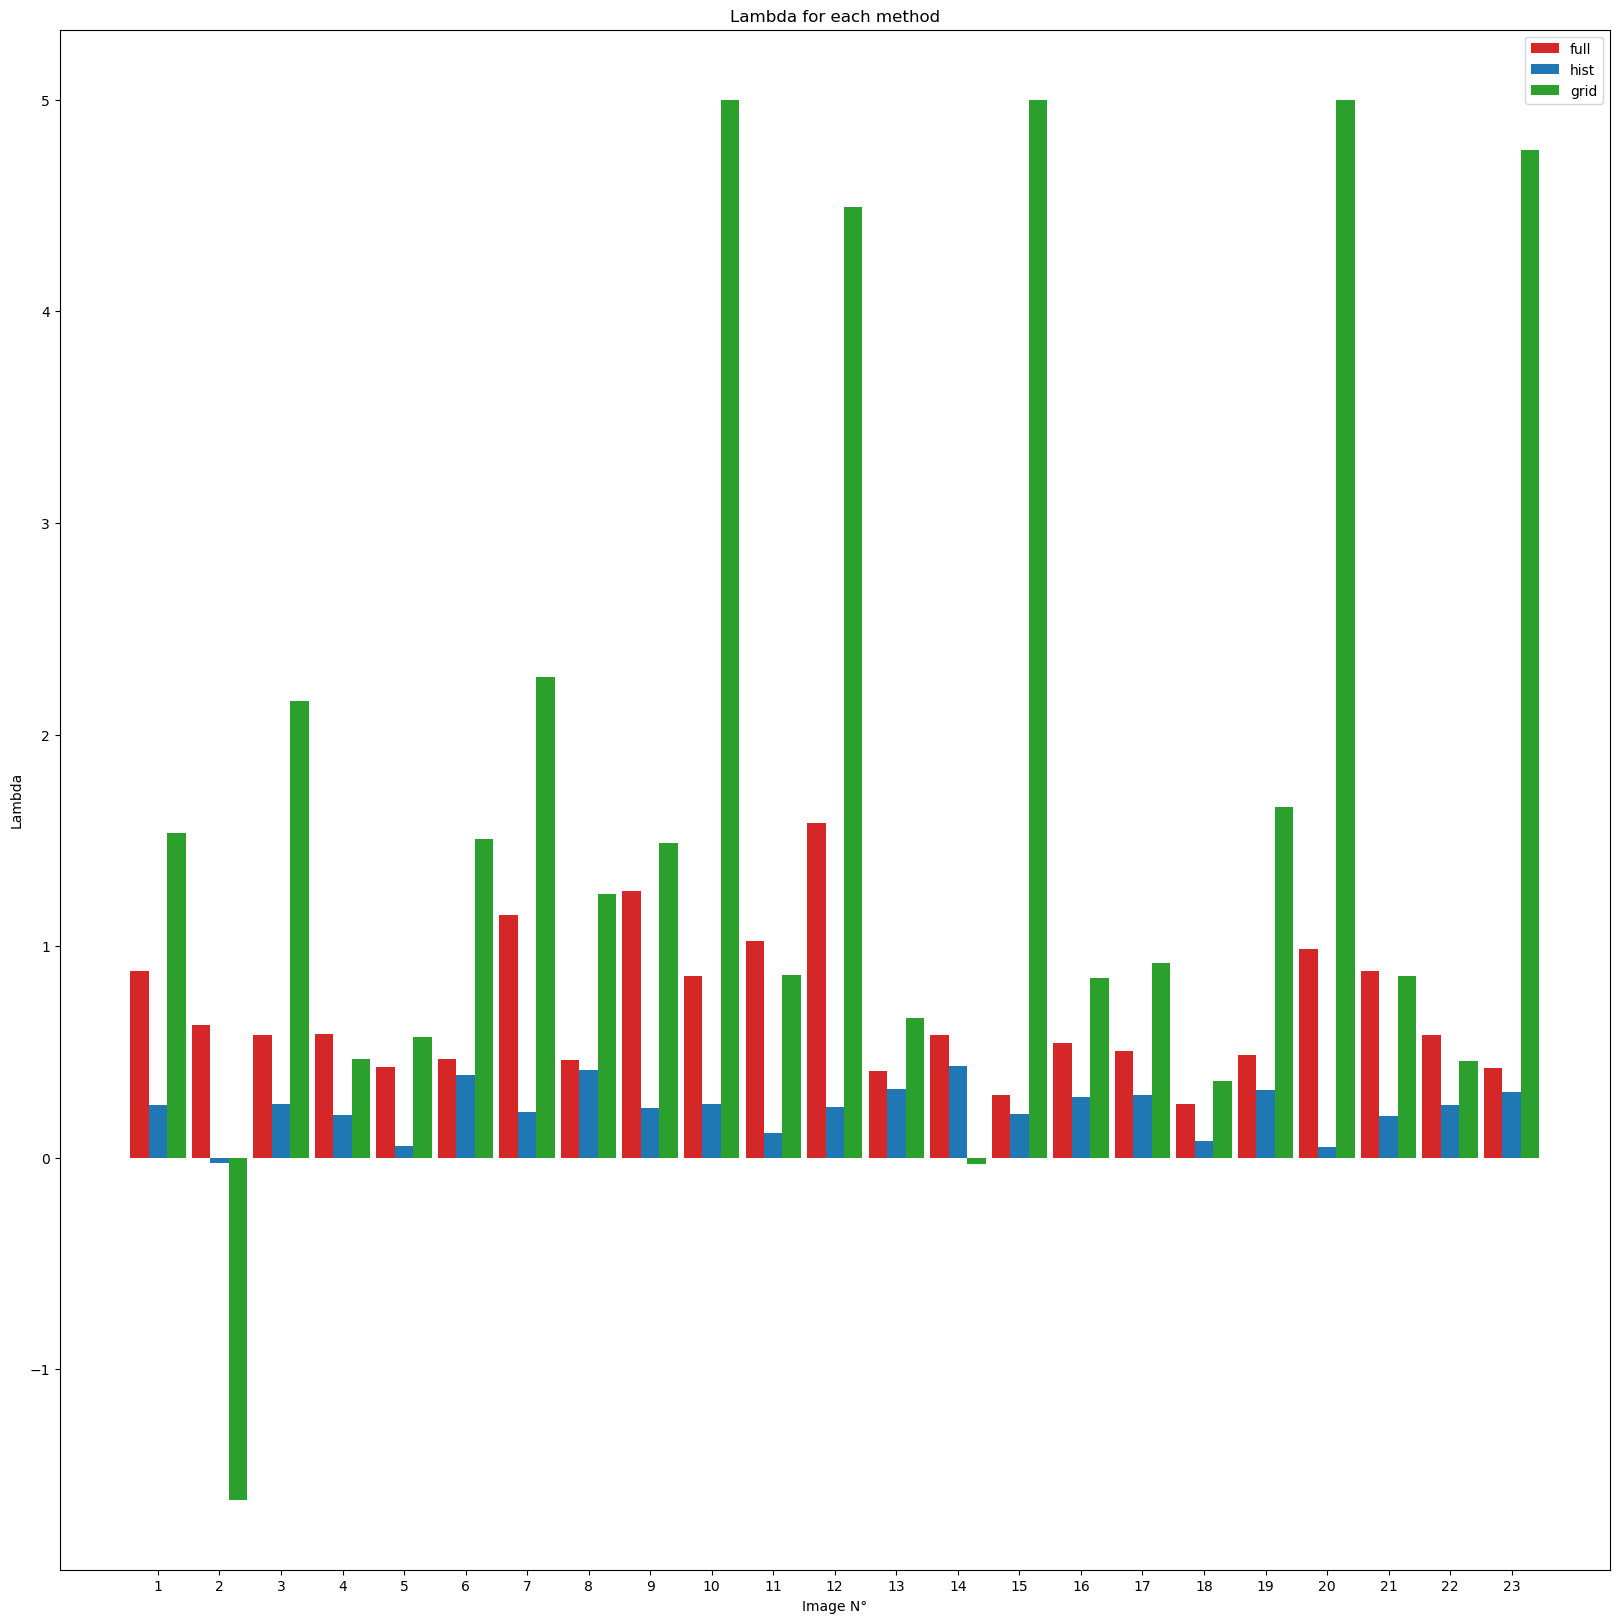

In [ ]:
#plot plot bars for ecah comparison metho
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
images = images_df_full['n_image']  
lambda_full = images_df_full['lambda_full']
lambda_hist = images_df_full['lambda_hist']
lambda_grid = images_df_full['lambda_grid'].clip(-10,5)

x_axis = np.arange(len(images))

bar_width = 0.3

ax.bar(x_axis, lambda_full, width=bar_width, label='full', color=color1)
ax.bar(x_axis + bar_width, lambda_hist, width=bar_width, label='hist', color=color2)
ax.bar(x_axis + 2*bar_width, lambda_grid, width=bar_width, label='grid', color=color3)
ax.legend()

plt.xticks(x_axis + bar_width, images)
plt.xlabel('Image N°')
plt.ylabel('Lambda')
plt.title('Lambda for each method')

plt.savefig('./figs/lambda_clip.png' bbox_inches='tight', pad_inches=0)
plt.show()


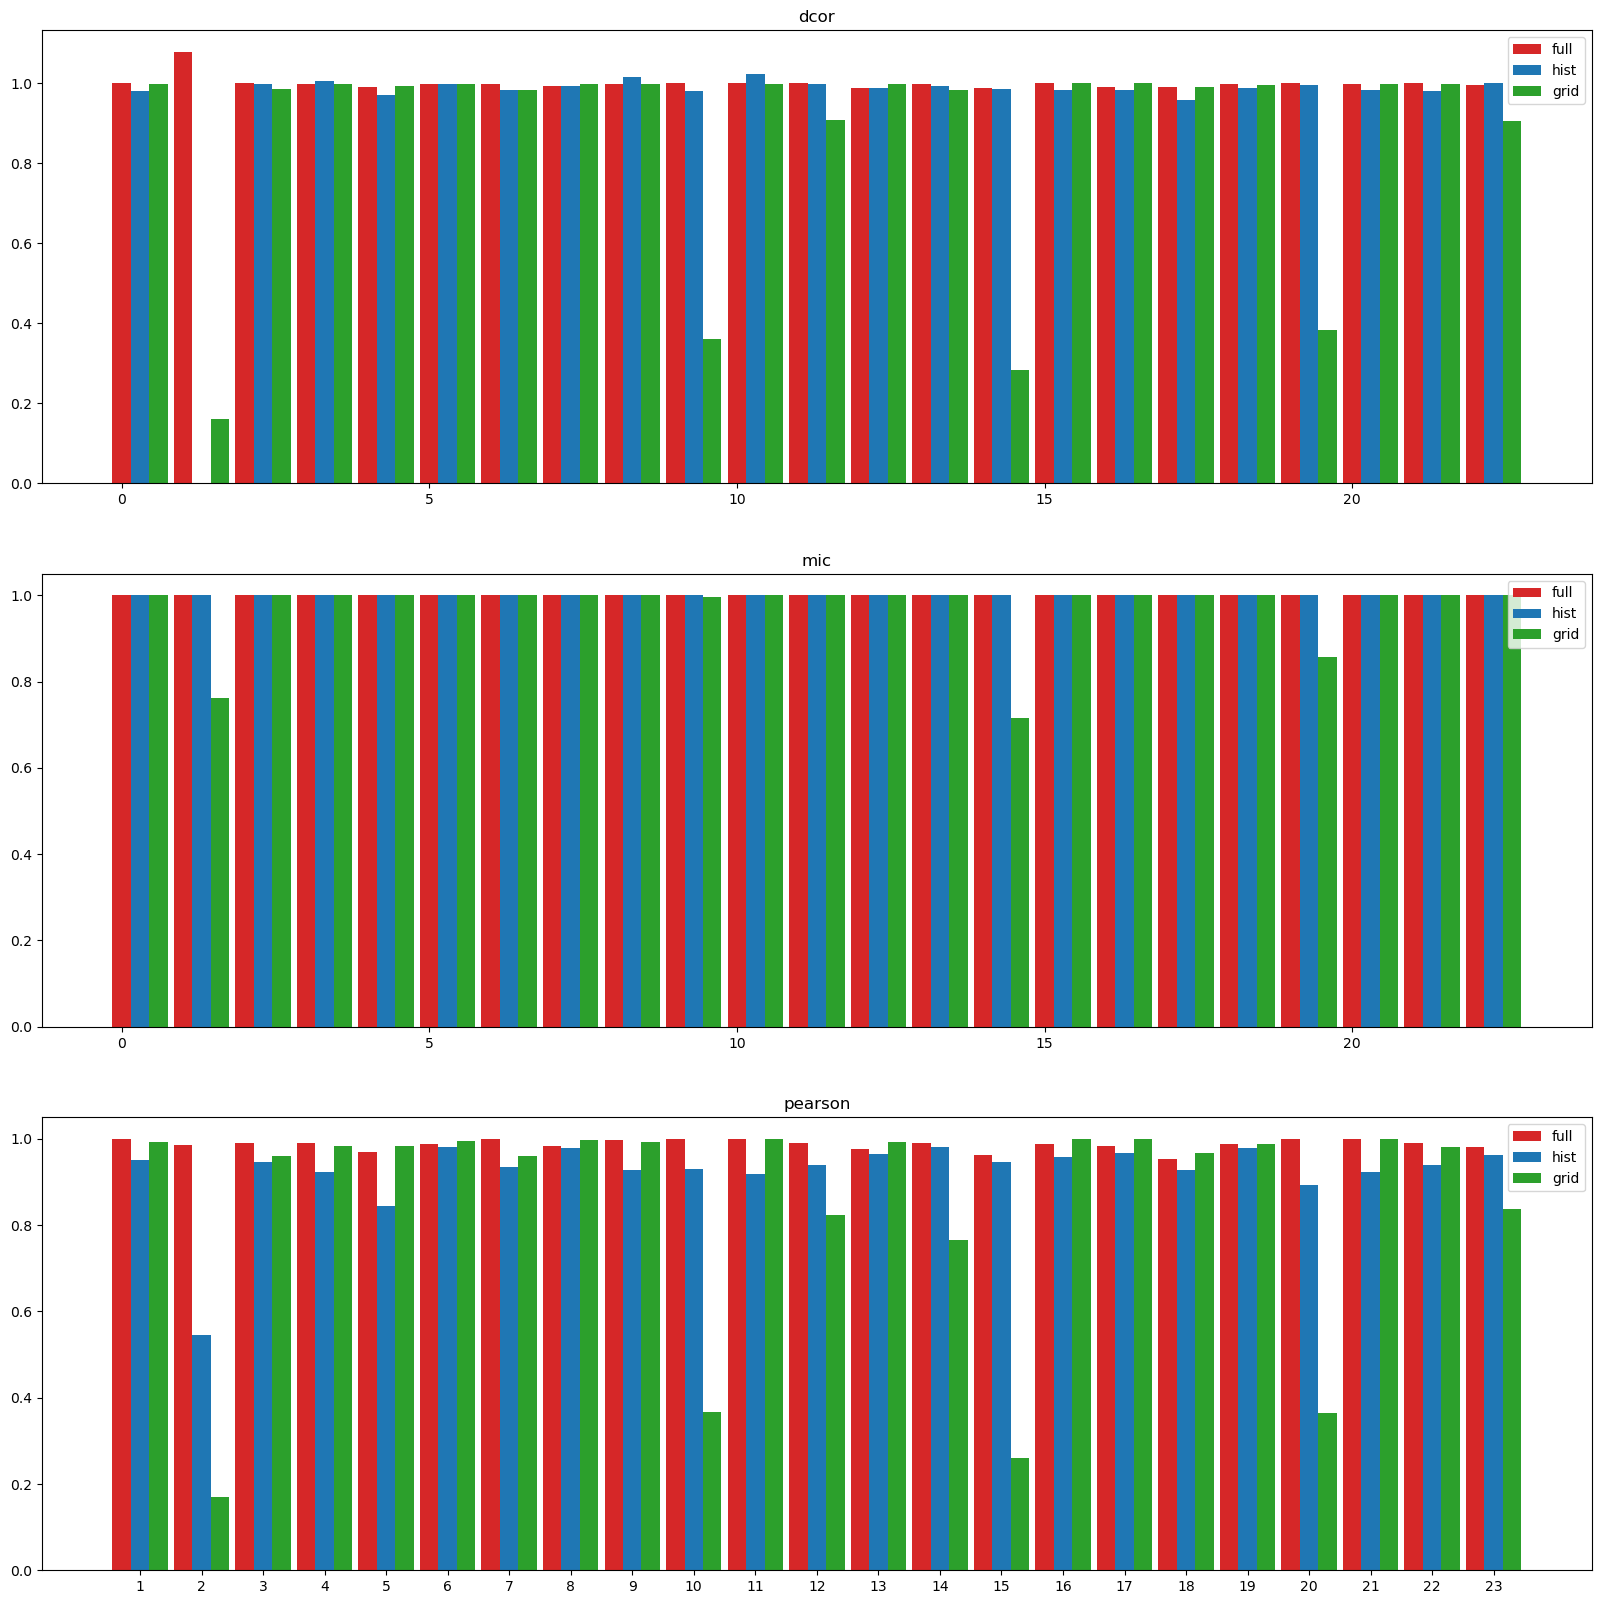

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
images = images_df_full['n_image']
dcor_full = images_df_full['dcor_full']
dcor_hist = images_df_full['dcor_hist']
dcor_grid = images_df_full['dcor_grid']

x_axis = np.arange(len(images))

bar_width = 0.3

ax[0].bar(x_axis, dcor_full, width=bar_width, label='full', color= color1)
ax[0].bar(x_axis + bar_width, dcor_hist, width=bar_width, label='hist', color= color2)
ax[0].bar(x_axis + 2*bar_width, dcor_grid, width=bar_width, label='grid', color= color3)
ax[0].set_title('dcor')
ax[0].legend()
plt.xticks(x_axis + bar_width, images)


mic_full = images_df_full['mic_full']
mic_hist = images_df_full['mic_hist']
mic_grid = images_df_full['mic_grid']

ax[1].bar(x_axis, mic_full, width=bar_width, label='full', color= color1)
ax[1].bar(x_axis + bar_width, mic_hist, width=bar_width, label='hist', color= color2)
ax[1].bar(x_axis + 2*bar_width, mic_grid, width=bar_width, label='grid', color= color3)
ax[1].set_title('mic')
ax[1].legend()
plt.xticks(x_axis + bar_width, images)

pearson_full = images_df_full['pearson_full']
pearson_hist = images_df_full['pearson_hist']
pearson_grid = images_df_full['pearson_grid']

ax[2].bar(x_axis, pearson_full, width=bar_width, label='full', color= color1)
ax[2].bar(x_axis + bar_width, pearson_hist, width=bar_width, label='hist', color= color2)
ax[2].bar(x_axis + 2*bar_width, pearson_grid, width=bar_width, label='grid', color= color3)
ax[2].set_title('pearson')
ax[2].legend()  

plt.xticks(x_axis + bar_width, images)


plt.savefig('./figs/plot_comparison_full.png' bbox_inches='tight', pad_inches=0)
plt.show()


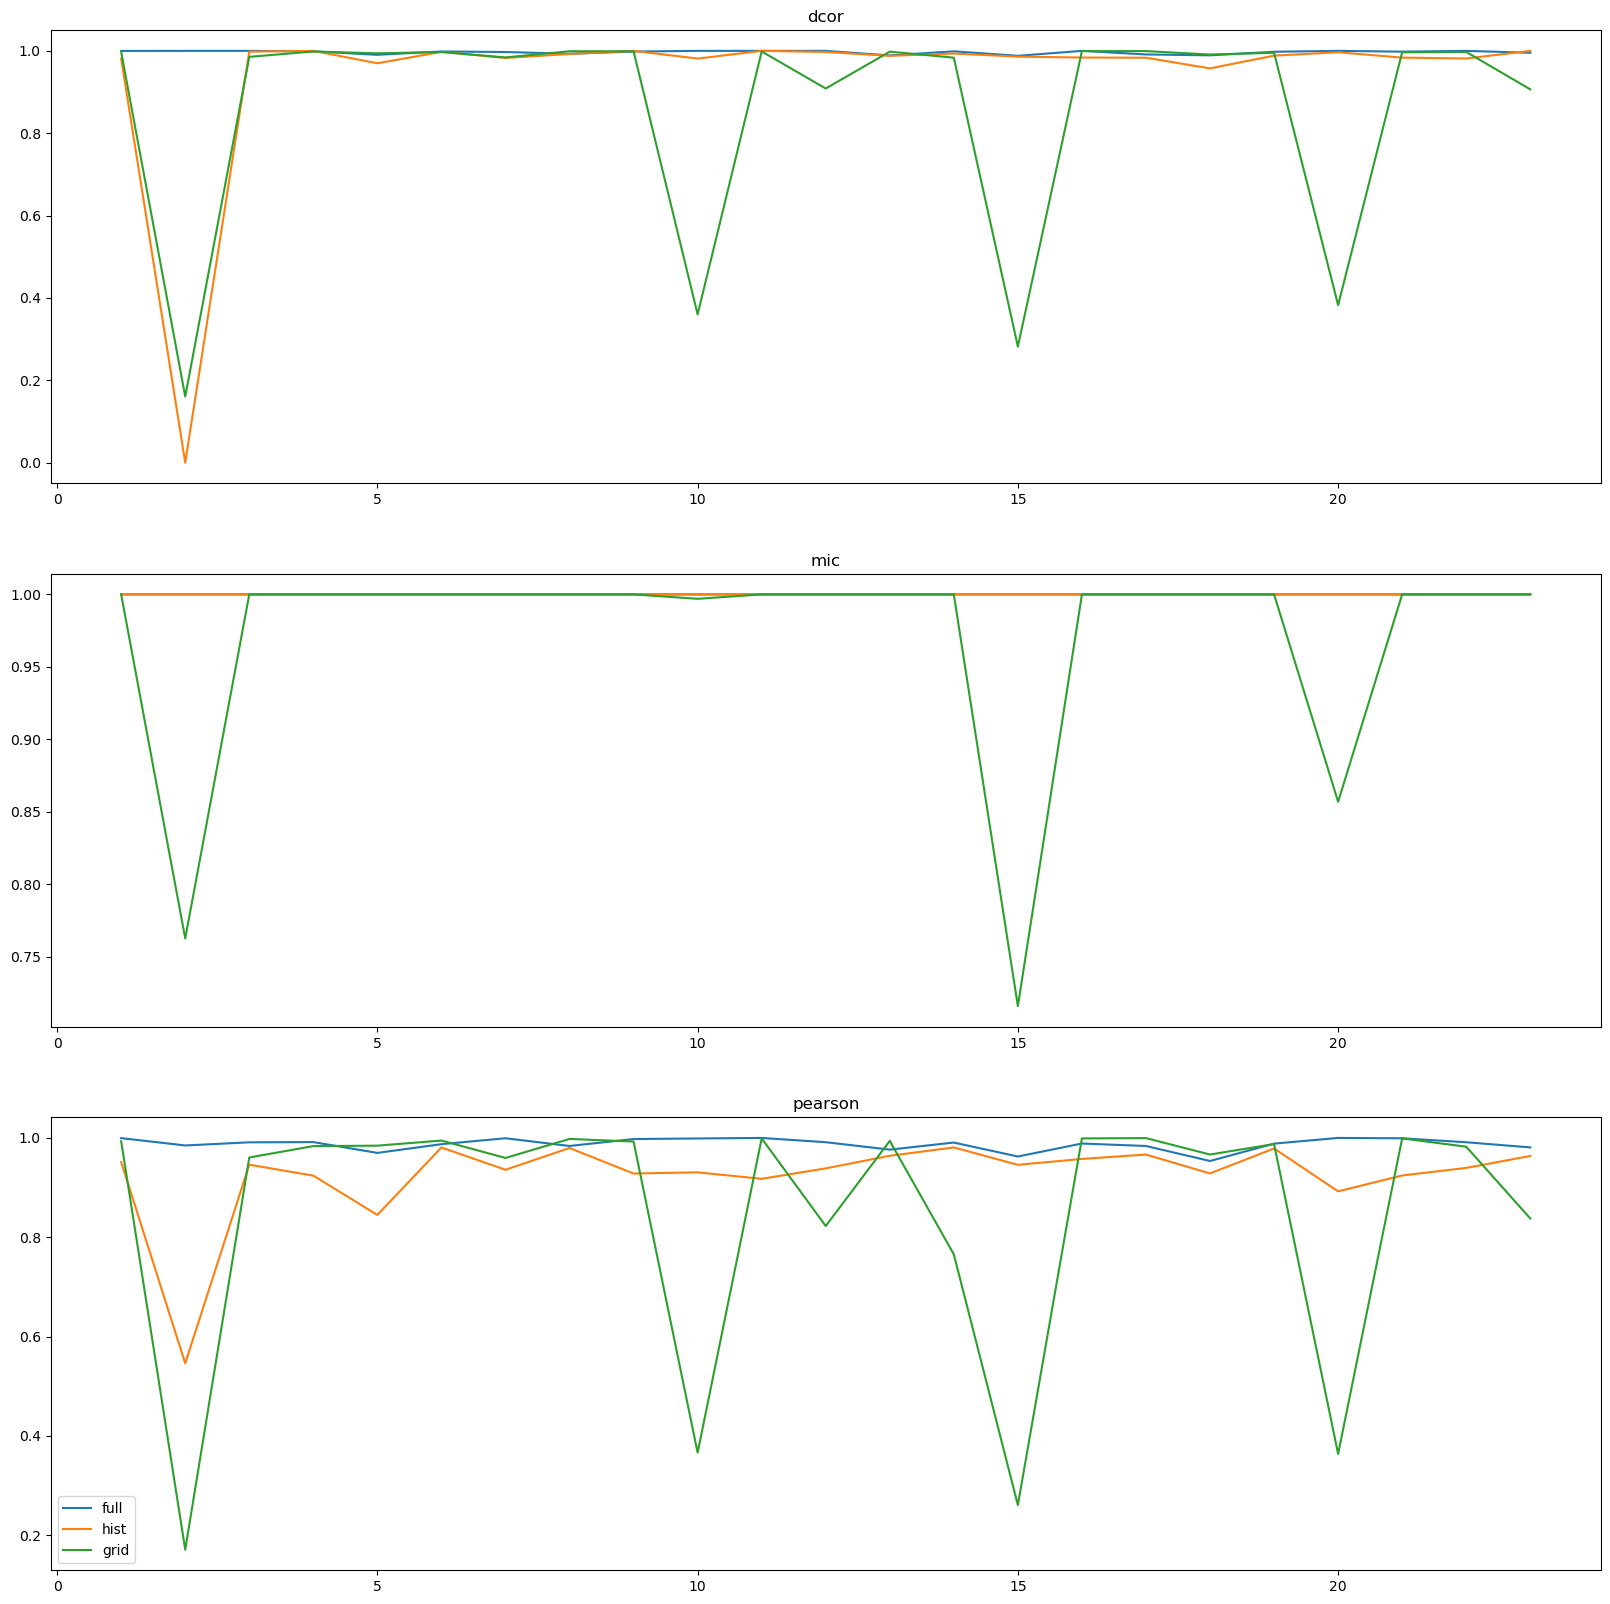

In [ ]:
#plot plot plots for ecah comparison metho
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

ax[0].plot(images_df_full['n_image'], images_df_full['dcor_full'].clip(0,1), label='full')
ax[0].plot(images_df_full['n_image'], images_df_full['dcor_hist'].clip(0,1), label='hist')
ax[0].plot(images_df_full['n_image'], images_df_full['dcor_grid'].clip(0,1), label='grid')
ax[0].set_title('dcor')

ax[1].plot(images_df_full['n_image'], images_df_full['mic_full'], label='full')
ax[1].plot(images_df_full['n_image'], images_df_full['mic_hist'], label='hist')
ax[1].plot(images_df_full['n_image'], images_df_full['mic_grid'], label='grid')  
ax[1].set_title('mic')


ax[2].plot(images_df_full['n_image'], images_df_full['pearson_full'], label='full')
ax[2].plot(images_df_full['n_image'], images_df_full['pearson_hist'], label='hist')
ax[2].plot(images_df_full['n_image'], images_df_full['pearson_grid'], label='grid')
ax[2].set_title('pearson')

plt.legend()



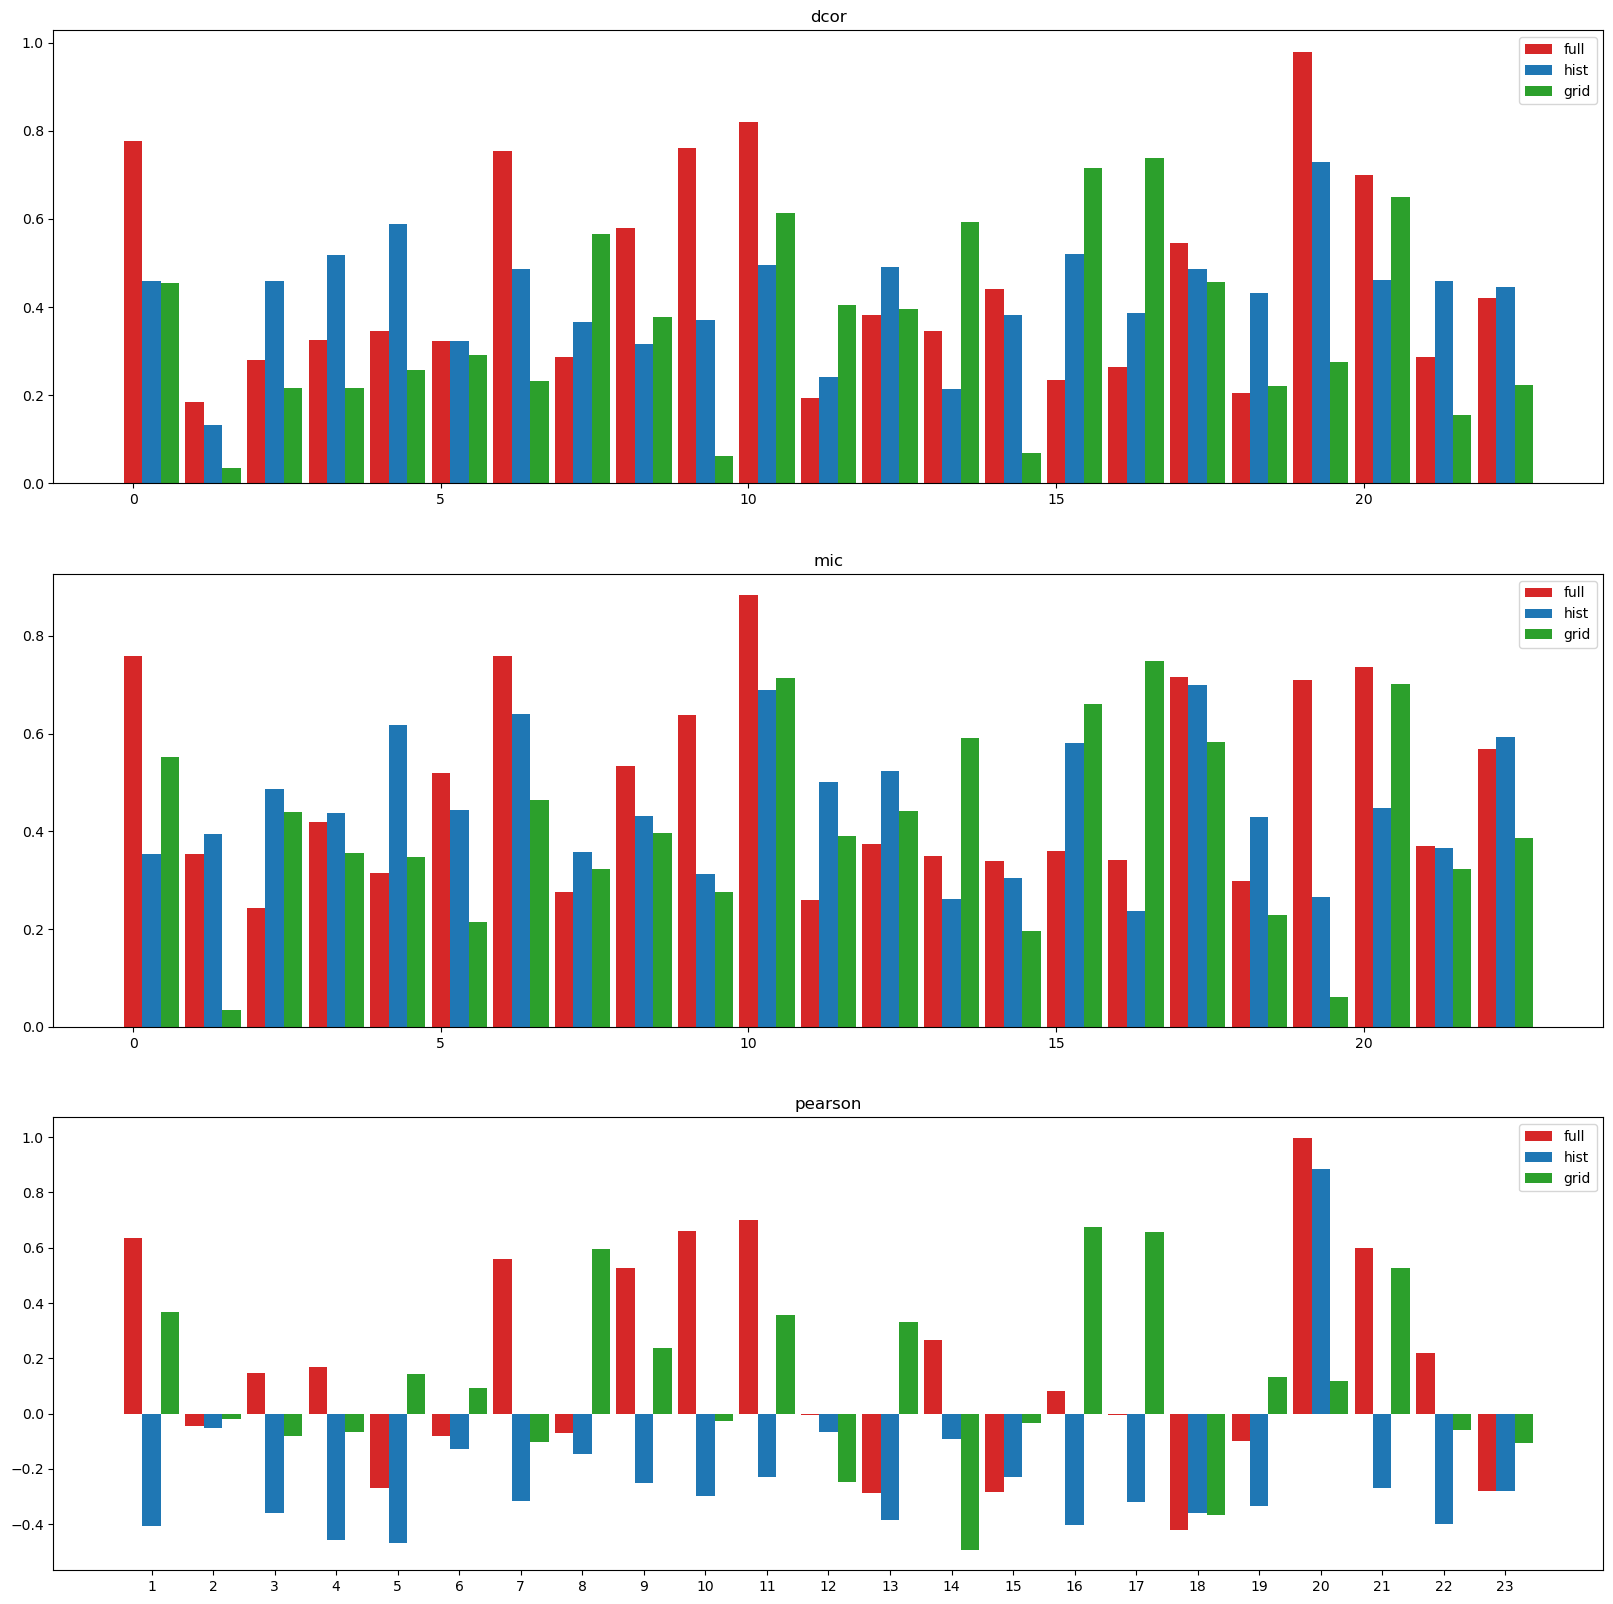

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
images = images_df_hist['n_image']
dcor_full = images_df_hist['dcor_full']
dcor_hist = images_df_hist['dcor_hist']
dcor_grid = images_df_hist['dcor_grid']

x_axis = np.arange(len(images))

bar_width = 0.3

ax[0].bar(x_axis, dcor_full, width=bar_width, label='full', color=color1)
ax[0].bar(x_axis + bar_width, dcor_hist, width=bar_width, label='hist', color=color2)
ax[0].bar(x_axis + 2*bar_width, dcor_grid, width=bar_width, label='grid', color=color3)
ax[0].set_title('dcor')
ax[0].legend()
# add xticks 
plt.xticks(x_axis + bar_width, images)

mic_full = images_df_hist['mic_full']
mic_hist = images_df_hist['mic_hist']
mic_grid = images_df_hist['mic_grid']

ax[1].bar(x_axis, mic_full, width=bar_width, label='full', color=color1)
ax[1].bar(x_axis + bar_width, mic_hist, width=bar_width, label='hist', color=color2)
ax[1].bar(x_axis + 2*bar_width, mic_grid, width=bar_width, label='grid', color=color3)
ax[1].set_title('mic')
ax[1].legend()
plt.xticks(x_axis + bar_width, images)

pearson_full = images_df_hist['pearson_full']
pearson_hist = images_df_hist['pearson_hist']
pearson_grid = images_df_hist['pearson_grid']

ax[2].bar(x_axis, pearson_full, width=bar_width, label='full', color=color1)
ax[2].bar(x_axis + bar_width, pearson_hist, width=bar_width, label='hist', color=color2)
ax[2].bar(x_axis + 2*bar_width, pearson_grid, width=bar_width, label='grid', color=color3)
ax[2].set_title('pearson')
ax[2].legend()

plt.xticks(x_axis + bar_width, images)
# save with no margins
plt.savefig('./figs/plot_comparison_hist.png', bbox_inches='tight', pad_inches=0)

plt.show()


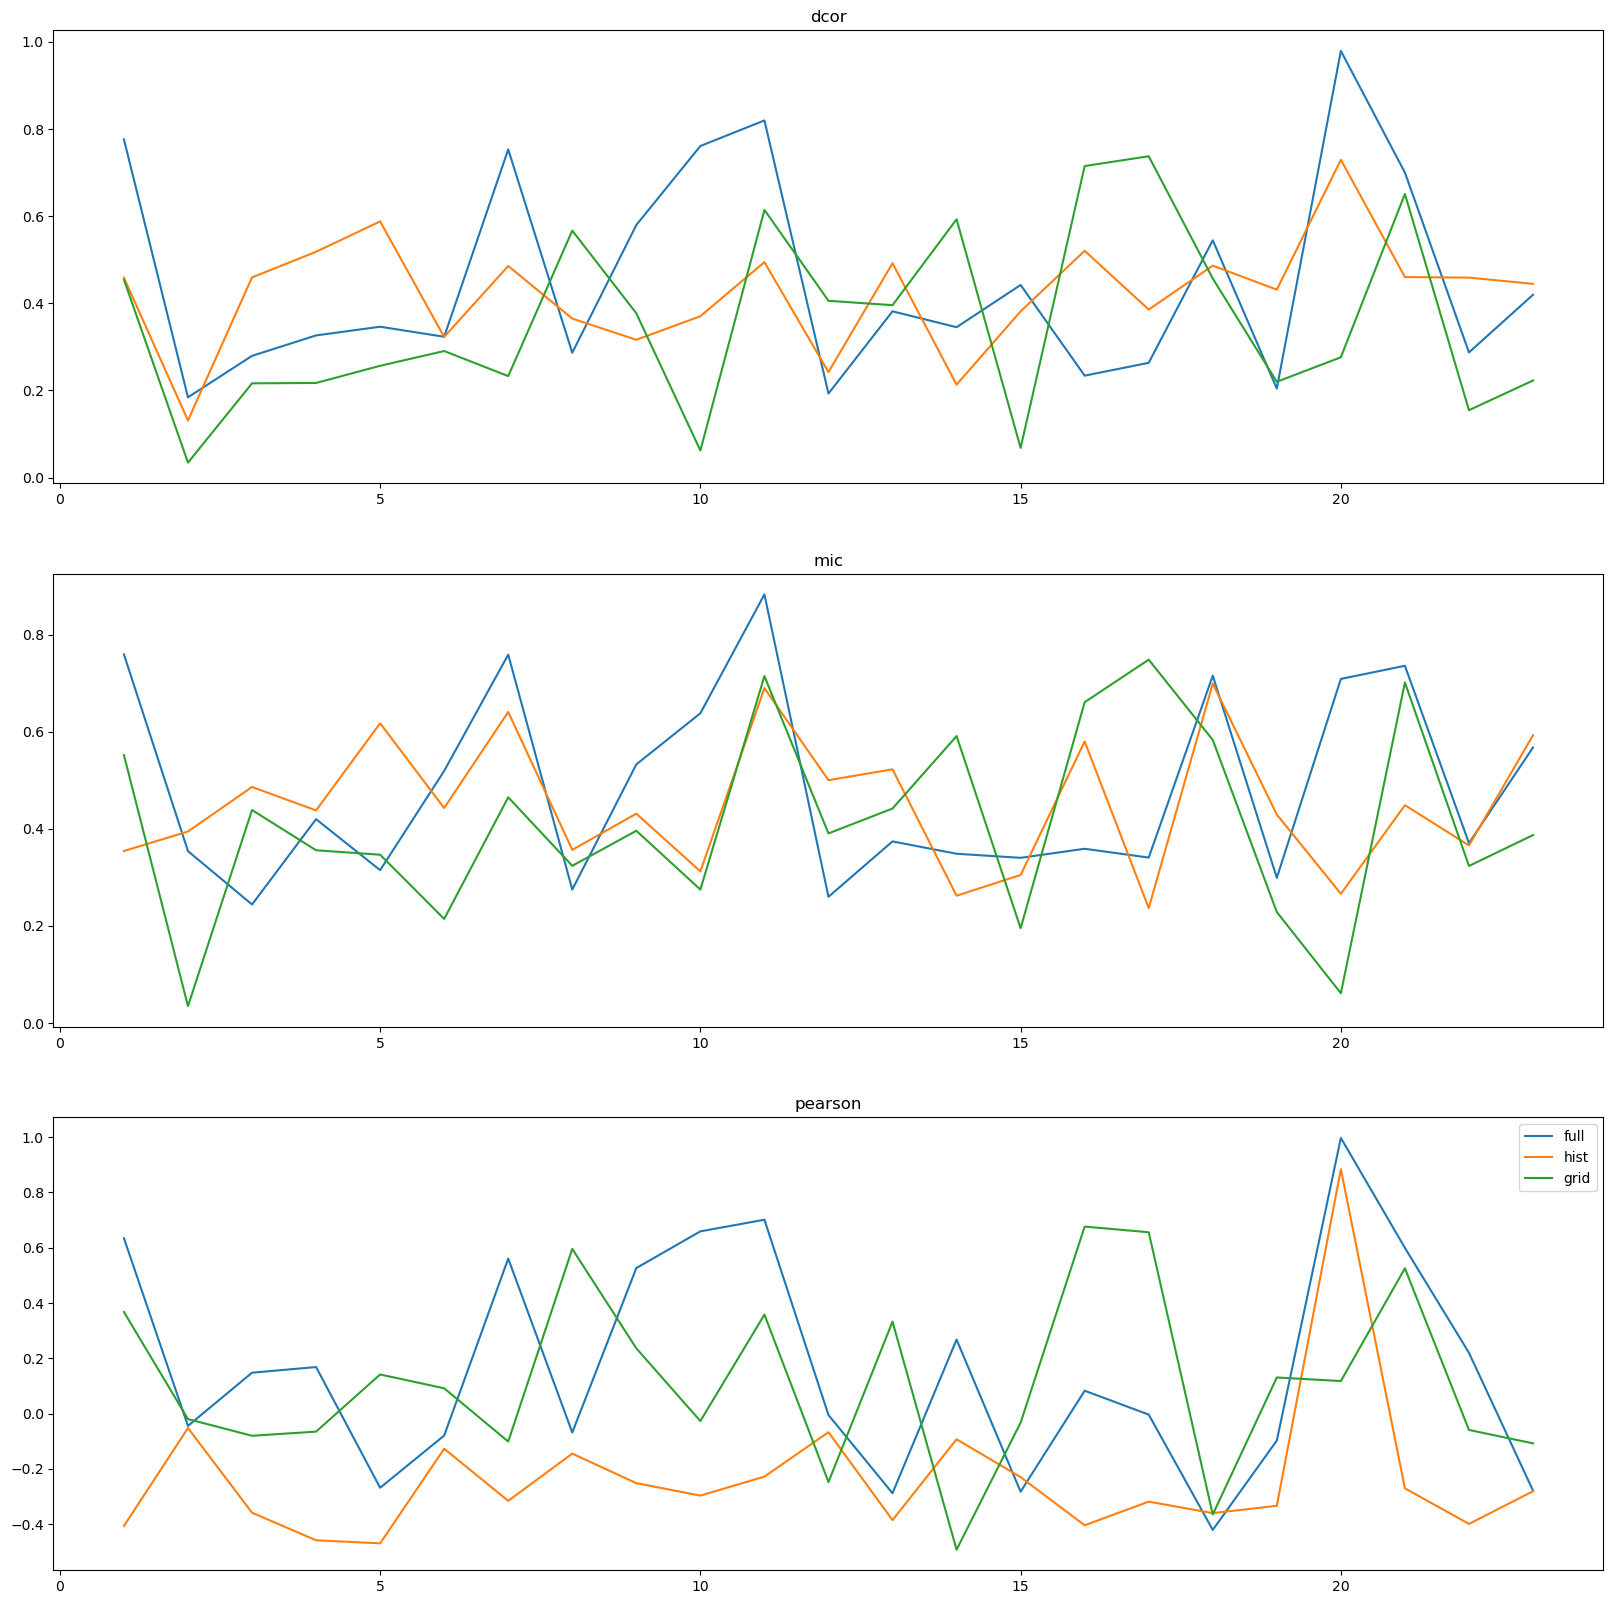

In [ ]:
#plot plot plots for ecah comparison metho
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

ax[0].plot(images_df_hist['n_image'], images_df_hist['dcor_full'].clip(0,1), label='full')
ax[0].plot(images_df_hist['n_image'], images_df_hist['dcor_hist'].clip(0,1), label='hist')
ax[0].plot(images_df_hist['n_image'], images_df_hist['dcor_grid'].clip(0,1), label='grid')
ax[0].set_title('dcor')

ax[1].plot(images_df_hist['n_image'], images_df_hist['mic_full'], label='full')
ax[1].plot(images_df_hist['n_image'], images_df_hist['mic_hist'], label='hist')
ax[1].plot(images_df_hist['n_image'], images_df_hist['mic_grid'], label='grid')  
ax[1].set_title('mic')

# ax[2].plot(images_df_hist['n_image'], images_df_hist['tic_full'], label='full')
# ax[2].plot(images_df_hist['n_image'], images_df_hist['tic_hist'], label='hist')
# ax[2].plot(images_df_hist['n_image'], images_df_hist['tic_grid'], label='grid')
# ax[2].set_title('tic')


ax[2].plot(images_df_hist['n_image'], images_df_hist['pearson_full'], label='full')
ax[2].plot(images_df_hist['n_image'], images_df_hist['pearson_hist'], label='hist')
ax[2].plot(images_df_hist['n_image'], images_df_hist['pearson_grid'], label='grid')
ax[2].set_title('pearson')

# add legend for each plot
plt.legend()


